In [61]:
# data analysis and wrangling
import copy
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 2A: Preparation
Eerst data inlezen:

In [76]:
# Training data
titanic = pd.read_csv('train.csv', sep=',')
tit_copy = titanic.copy()
tit_copy.describe(include='all')
# Inladen van de testdata:
titanic_test = pd.read_csv('test.csv', sep=',')
test_copy = titanic_test.copy()
# Beide
all_data = [tit_copy, test_copy]

Attributes: *ID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked*

Nu kijken welke datatypes het zijn:

In [85]:
int_columns = list(tit_copy.columns[tit_copy.dtypes == 'int64'])
float_columns = list(tit_copy.columns[tit_copy.dtypes == 'float64'])
string_columns = list(tit_copy.columns[tit_copy.dtypes == 'object'])

print(f"Integer columns: {int_columns}")
print(f"Float columns: {float_columns}")
print(f"String columns: {string_columns}")

Integer columns: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']
Float columns: ['Age', 'Fare']
String columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [22]:
tit_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Kijken voor de kolommen hoe de kolommen eruit zien:

In [14]:
# Eerst de integer kolommen

tit_copy['PassengerId'] # Gewoon ID's, hebben we waarschijnlijk niet heel veel aan

tit_copy['Survived'] # Of ze het overleefd hebben; binair;  uitkomst variabele;  0=nee, 1=ja   
tit_copy['Survived'].value_counts() # 38% (342) heeft het overleefd

tit_copy['Pclass'] # Klasse waarin ze reisden; ordinaal;  1=eerste,2=tweede,3=derde
tit_copy['Pclass'].value_counts() # 3: 491,  2: 216,  1: 184

tit_copy['SibSp'] # Aantal broertjes/partners aan boord;  discreet
tit_copy['SibSp'].value_counts() # 0: 608,  1: 209,  2: 28,  3: 16,  4: 18,  5: 5,  8: 7

tit_copy['Parch'] # Aantal ouders/kinderen aan boord;  discreet
tit_copy['Parch'].value_counts() #0: 678,  1: 118,  2: 80,  3: 5,  4: 4,  5: 5,  6: 1

# Nu de float kolommen

tit_copy['Age'] # Leeftijd;    continue;
tit_copy['Age'].isnull().sum() # 177 NA's
np.mean(tit_copy['Age']) # Gemiddelde leeftijd = 29.7
np.std(tit_copy['Age']) # Met een std van 14.5

tit_copy['Fare'] # Ticket prijs    continue
np.mean(tit_copy['Fare']) # Gemiddelde fare van 32.2
np.std(tit_copy['Fare']) # Met een std van 49.6

# Nu de string kolommen

tit_copy['Name'] # Namen, hebben we niet heel veel aan waarschijnlijk

tit_copy['Sex'] # Geslacht; male=man, female=vrouw
tit_copy['Sex'].value_counts()  # 577 mannen,   314 vrouwen

tit_copy['Ticket'] # Ticket nummer, lijkt me ook niet relevant

tit_copy['Cabin'] # Hun cabine nummer, heel veel NA's
tit_copy['Cabin'].isnull().sum() # 687/891 NA's

tit_copy['Embarked'] # Waar ze opgestapt zijn;  C = Cherbourg, Q = Queenstown, S = Southampton
tit_copy['Embarked'].value_counts(dropna=False) # S: 644,  C: 168,  Q: 77    2 NA's

print(tit_copy.isnull().sum()) # Age heeft 177 NA's en Cabin 687, Embarked 2

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Eerst wat descriptive plots van de continue variabelen:

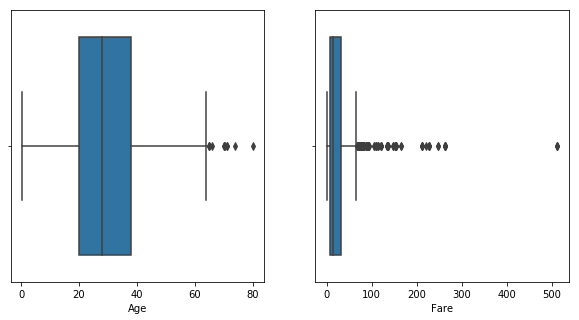

In [87]:
f, _ = plt.subplots(2, 2, figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(tit_copy['Age'])
plt.subplot(1,2,2)
sns.boxplot(tit_copy['Fare']) # Een outlier op rechts

Er is één grote outlier bij Fare waar waarschijnlijk iets mee gedaan moet worden. Moeten we ook iets met de rest doen? En er zijn bij Age en Fare blijkbaar 0-values. Zijn dit pasgeboren baby's en mensen die gratis reisden of zijn dit ook missing value's?

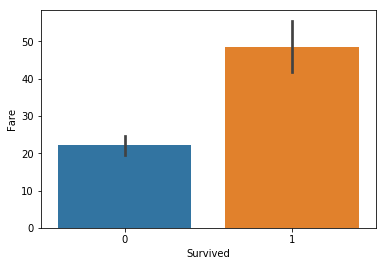

In [124]:
sns.barplot(tit_copy['Survived'], tit_copy['Fare'])

Aan dit plotje te zien is de gemiddelde Fare bij overlevenden groter dan bij niet-overlevenden. Komt dit doordat ze in een betere klasse zaten of door de outlier of is er een andere reden?

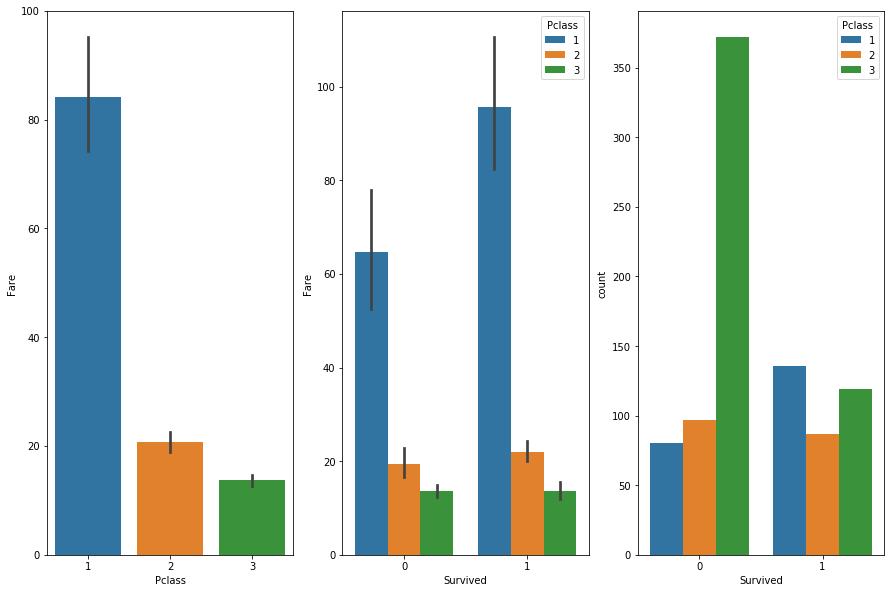

In [134]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.barplot(tit_copy['Pclass'], tit_copy['Fare'])
plt.subplot(1,3,2)
sns.barplot(tit_copy['Survived'], tit_copy['Fare'], tit_copy['Pclass'])
plt.subplot(1,3,3)
sns.countplot(tit_copy['Survived'], hue=tit_copy['Pclass'])

De Fare van de eerste klasse was significant veel hoger. Er is ook een significant verschil qua prijs tussen de mensen die het wel overleefd hebben en 1e klasse reisden vs de mensen die het niet overleefd hebben en 1e klas reisden. Kregen de mensen die veel geld betaalden voorrang? De mensen die het niet overleefd hebben kwamen voornamelijk uit de 3e klasse. Wijst er ook op dat dat een factor kan zijn

Kijken hoe de leeftijd en het geslacht verdeeld is onder de overlevenden:

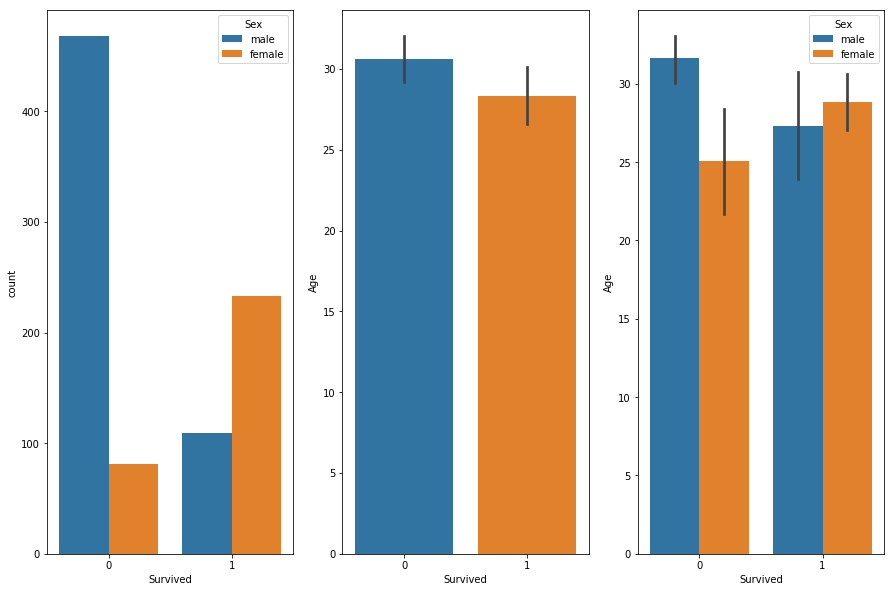

In [122]:
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
sns.countplot(tit_copy['Survived'], hue=titanic['Sex']) # Veel meer mannen die het niet overleefd hebben
plt.subplot(1,3,2)
sns.barplot(tit_copy['Survived'], titanic['Age']) # Bij leeftijd niet echt een verschil te zien
plt.subplot(1,3,3)
sns.barplot(tit_copy['Survived'], titanic['Age'], titanic['Sex']) # Gem leeftijd van overleden mannen is hoger dan overleden vrouwen.

Er zijn veel meer mannen dan vrouwen overleden. Ook zijn er veel meer vrouwen dan mannen die het wel hebben overleefd. Bij de gemiddelde leeftijs is geen groot verschil te zien, behalve als je gaat filteren op geslacht. De gemiddelde leeftijd van overleden mannen is groter dan van overleden vrouwen. De leeftijd van overlevende mannen/vrouwen is ong gelijk

Kijken hoe het aantal familieleden/partners verdeeld is:

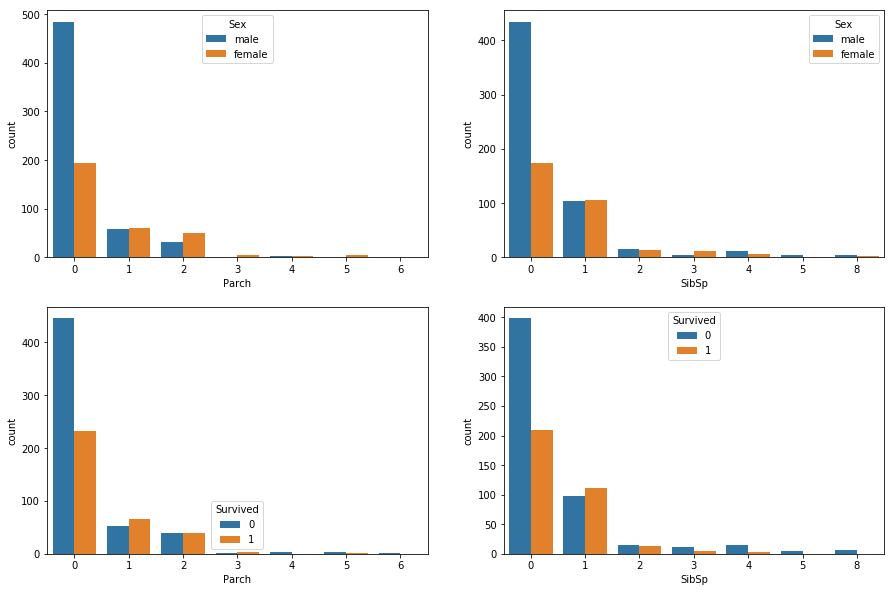

In [120]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(tit_copy['Parch'], hue=tit_copy['Sex']) # Meer mannen dan vrouwen zonder ouders/kinderen
plt.subplot(2,2,2)
sns.countplot(tit_copy['SibSp'], hue=tit_copy['Sex']) # Meer mannen dan vrouwen zonder broers
plt.subplot(2,2,3)
sns.countplot(tit_copy['Parch'], hue=tit_copy['Survived']) # Dus ook veel mensen zonder familie die gestorven zijn
plt.subplot(2,2,4)
sns.countplot(tit_copy['SibSp'], hue=tit_copy['Survived']) # Is logisch want meer mannen overleden en meer mannen alleen -> meer mensen alleen overleden

Er zijn veel meer mannen die geen ouders/kinderen of broers/geliefdes hebben dan vrouwen. Bij mensen die wel familie hebben is de man-vrouw verdeling 50-50. Dit geldt ook voor de verdeling van overlevenden onder de mensen: De verhouding van mensen die niet overleden tegenover wel overleden is veel groter bij mensen zonder familie dan bij mensen met.

Kijken naar Embarked:

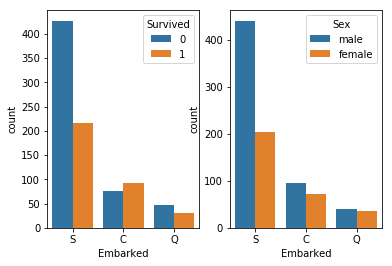

In [117]:
sns.countplot(tit_copy['Embarked']) # Meeste komen uit Southampton
plt.subplot(1,2,1)
sns.countplot(tit_copy['Embarked'], hue=tit_copy['Survived']) # Meer mensen uit Southampton niet dan wel overleefd
plt.subplot(1,2,2)
sns.countplot(tit_copy['Embarked'], hue=tit_copy['Sex']) # Waren ook veel meer mannen uit Southampton

Ong 2/3 van de mensen die in Southampton zijn opgestapt zijn overleden. Dit komt ong overeen met de man/vrouw verhouding. Voor Cherbourg zijn deze verhoudingen een beetje omgedraaid, maar het is de vraag of dit significant is. Voor Queenstown is het ongeveer hetzelfde

Kijken naar Pclass:

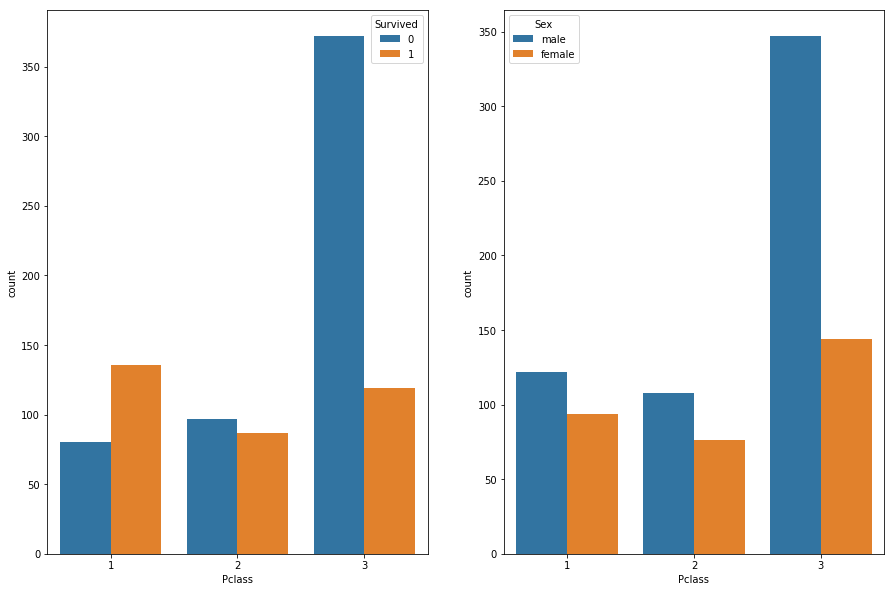

In [119]:
# sns.countplot(tit_copy['Pclass'])  # Veel meer mensen derde klasse
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(tit_copy['Pclass'], hue=tit_copy['Survived']) # In derde klasse veel meer mensen niet overleefd, in 1e klasse wel
plt.subplot(1,2,2)
sns.countplot(tit_copy['Pclass'], hue=tit_copy['Sex']) # Veel meer mannen in derde klasse, ook wat meer in eerste klasse wel

De verdeling van het aantal overledenen in de derde klasse komt overeen met de verdeling man/vrouw. De verdeling overlevenden in de eerste klasse is wat omgekeerd: meer overlevenden in de eerste klasse, maar ook meer mannen in eerste klasse. Zou erop kunnen wijzen dat de klasse waarin je reist ook gecorreleerd is met de  overlevingskans?

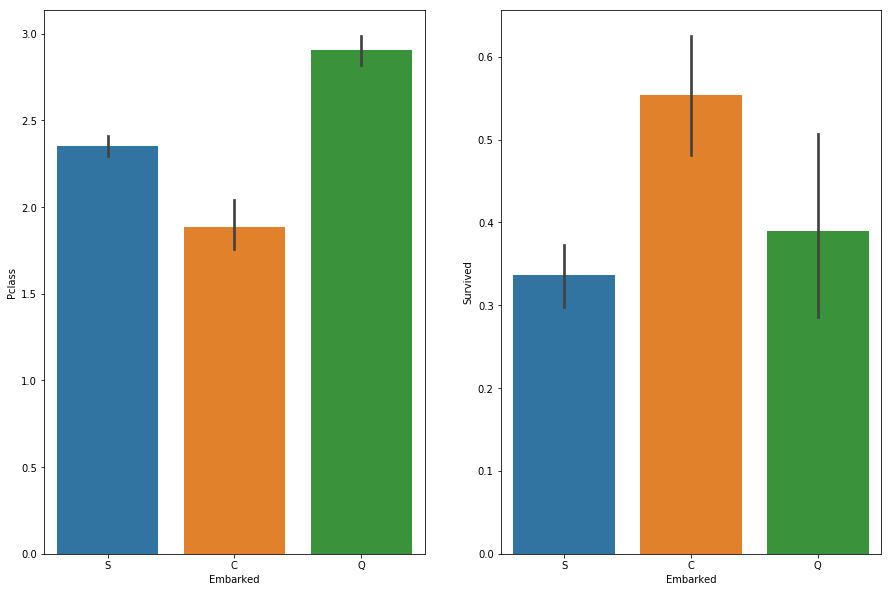

In [118]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.barplot(tit_copy['Embarked'], tit_copy['Pclass'])
plt.subplot(1,2,2)
sns.barplot(tit_copy['Embarked'], tit_copy['Survived'])

Mensen uit Cherbourg zaten gemiddeld genomen in de beste klasse en daarvan heeft het hoogste percentage het overleefd

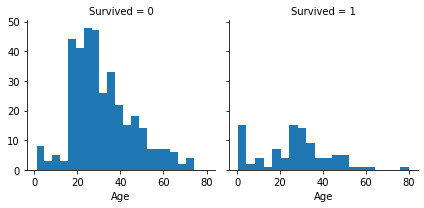

In [60]:
# Survival of men, for different ages
man = sns.FacetGrid(tit_copy[tit_copy["Sex"]=="male"], col='Survived')
man.map(plt.hist, 'Age', bins=20)

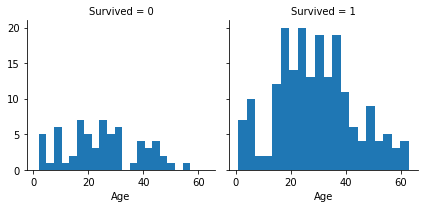

In [59]:
# Survival of women, for different ages
vrouw = sns.FacetGrid(tit_copy[tit_copy["Sex"]=="female"], col='Survived')
vrouw.map(plt.hist, 'Age', bins=20)

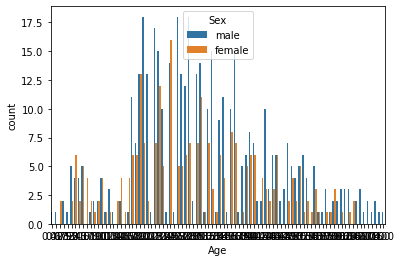

In [36]:
sns.countplot(tit_copy['Age'], hue=tit_copy['Sex']) 

#### Remove NA's for age and embarked:

#### Correlating the features with survival / with each other

### Data pre-processing
#### Feature selection based on observations 